In [3]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('customer_churn_telecom.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#checking the data types of all the columns
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#checking the dimensions of the dataset and null values
print('dimensions: ',dataset.shape)
print('\nnumber of null values\n',dataset.isnull().sum())

dimensions:  (7043, 21)

number of null values
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


We do not have any missing values in the data provided.

In [7]:
#names of columns
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#descriptive statistics of numeric variables
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Total charges column must also contain numeric data, converting TotalCharges  column from object to float
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')

#dataset.dtype

dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges column now has 11 missing values which weren't identified earlier as the data type was different,but 11 records off of 7043 records is not very significant.
Hence,dropping the records from the data.

In [10]:
dataset.dropna(inplace=True)
dataset.shape

(7032, 21)

In [11]:
# dataset.dtype
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Avg monthly charges -> $64.79

25% customers pay around 35.58 which is much less than the avg and 25% of the customers pay more than $89.86 (greater than avg)

Avg total charges -> $2283.300441
25% people pay under $401.45


In [12]:
dataset['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

<Axes: xlabel='Contract', ylabel='count'>

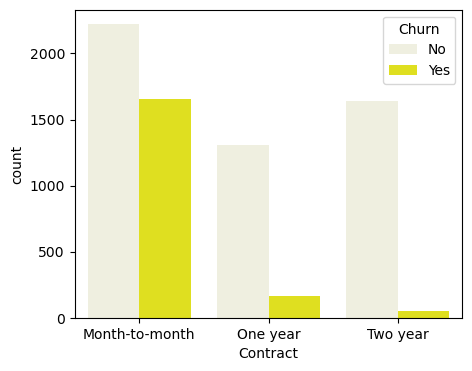

In [13]:
plt.figure(figsize=(5,4)) 
sns.countplot(data=dataset, x='Contract', hue='Churn',color = 'yellow')

Customers with month-to-month contract type are likely to churn more often than the ones with year wise contract type.

Text(0.5, 1.0, 'Count of TARGET Variable per category')

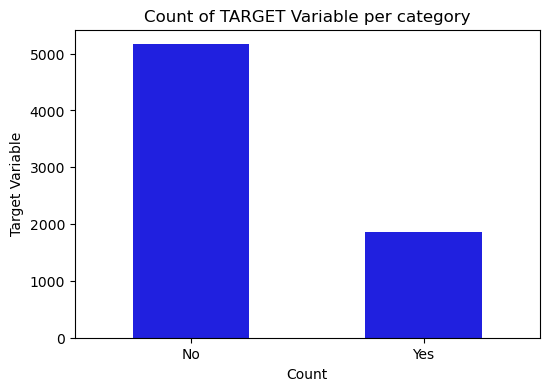

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset,x='Churn',width = 0.5,color = 'blue')
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category")

In [15]:
dataset['Churn'].value_counts() 

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [16]:
dataset['Churn'].value_counts()*100/len(dataset['Churn'])  


Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

The target variable is highly imbalanced so the data is analysed with other features while taking the target values separately to gain insights.

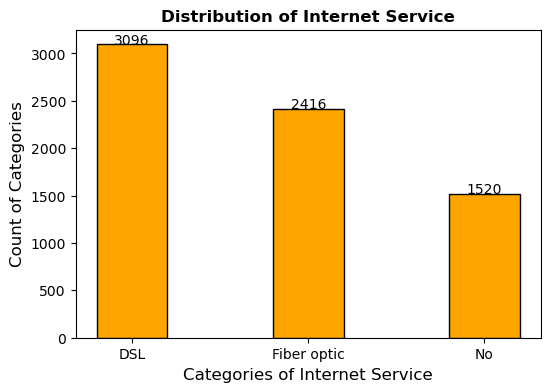

In [17]:
# customer_churn['InternetService'].nunique() #3
x = dataset['InternetService'].unique()
y =dataset['InternetService'].value_counts()
plt.figure(figsize=(6,4))
g = plt.bar(x,y,color= 'orange',width =0.4,edgecolor='black')

def addlabels(a,b):
    for i in range(len(a)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(x,y)

plt.title('Distribution of Internet Service',weight ='bold')
plt.xlabel('Categories of Internet Service',fontsize = 12)
plt.ylabel('Count of Categories',fontsize = 12)
plt.show()

<Axes: xlabel='InternetService', ylabel='count'>

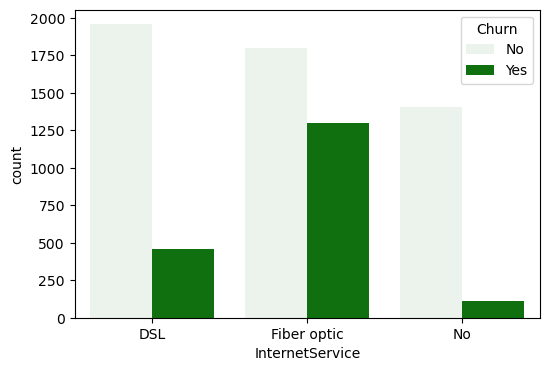

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data = dataset,x='InternetService',hue='Churn',color='green')


The segment of customers which use fiber optic internet service are likely to churn more.

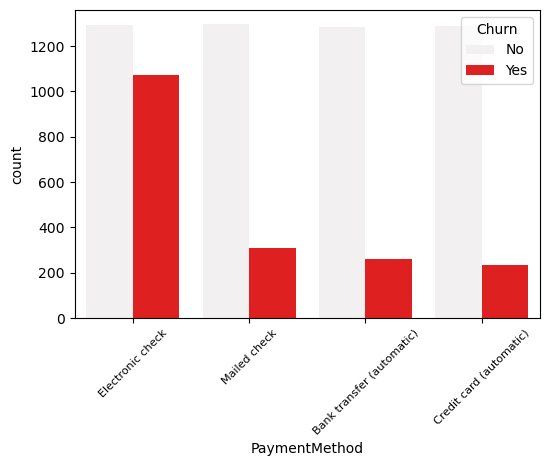

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset,x='PaymentMethod',hue='Churn',color='red')
plt.xticks(fontsize = 8,rotation= 45)
plt.show()

Customers who pay through an electronic cheque have a higher chance of churning out.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

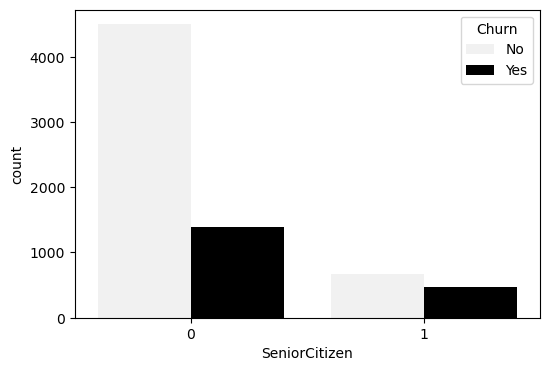

In [20]:
plt.figure(figsize=(6,4))

sns.countplot(data=dataset,x='SeniorCitizen',hue='Churn',color='black')

Ratio of churn is higher in the senior citizen population. Younger demographic has a lower ratio of churn(churn value yes:no)

<Axes: xlabel='gender', ylabel='count'>

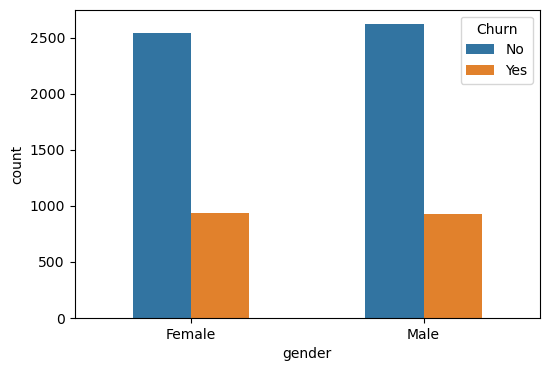

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset,x='gender',hue='Churn',width=0.5)

Almost exactly the same number for both genders.Does not play an important role in churn determination by itself.

<Axes: xlabel='Partner', ylabel='count'>

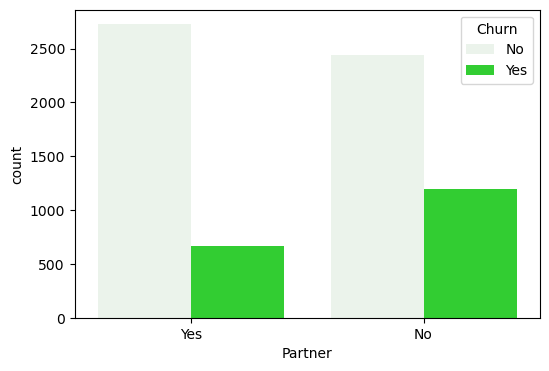

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset,x='Partner',hue='Churn',color='limegreen',saturation=5)

Customers who do not have a partner are more likely to churn(rough ratio comparison)

<Axes: xlabel='Dependents', ylabel='count'>

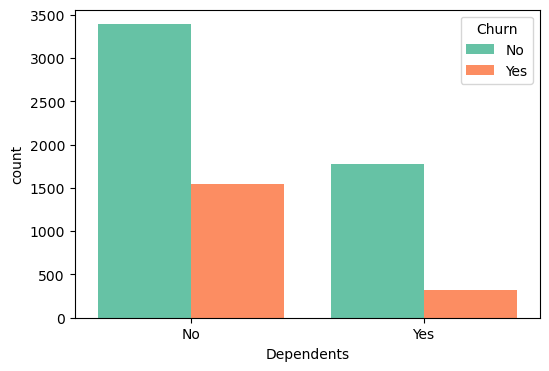

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset,x='Dependents',hue='Churn',palette='Set2',saturation=5)

Customers with no depencies are more likely to churn.

In [24]:
dataset['Churn'] = np.where(dataset.Churn == 'Yes',1,0)
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [25]:
# dataset.dtypes
#  dataset[['MonthlyCharges','TotalCharges','Churn']].corr()


In [26]:
# importing the required function
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(index=dataset['TechSupport'],columns=dataset['Churn'])
print(cross_tab)


chi_sq_result = chi2_contingency(cross_tab)
# chi_sq_result 

p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")

Churn                   0     1
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310
The p-value is 7.407807748843711e-180 and hence we reject the null Hpothesis with 2 degrees of freedom


   So, Tech Support is correlated to number of people churning out.

<BarContainer object of 3 artists>

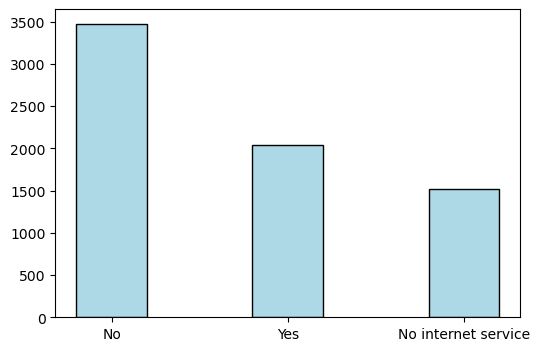

In [27]:
#bar plot of the tech support feature

x = dataset['TechSupport'].unique()
y =dataset['TechSupport'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(x,y,color= 'lightblue',width =0.4,edgecolor='black')


Customers with no tech support are more likely to churn 

In [28]:
#coverting the categorical variables(like gender,partner,dependents etc )into dummy variables  #one-hot encoding
# cat_cols = ['gender','Partner','Dependents','PaymentMethod','InternetService']
dataset.drop(columns= ['customerID'], axis=1, inplace=True)
dataset.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [29]:
#converting categorical columns to numeric values #,drop_first= True
dataset_dummies = pd.get_dummies(dataset,dtype='int')
dataset_dummies.head(5)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

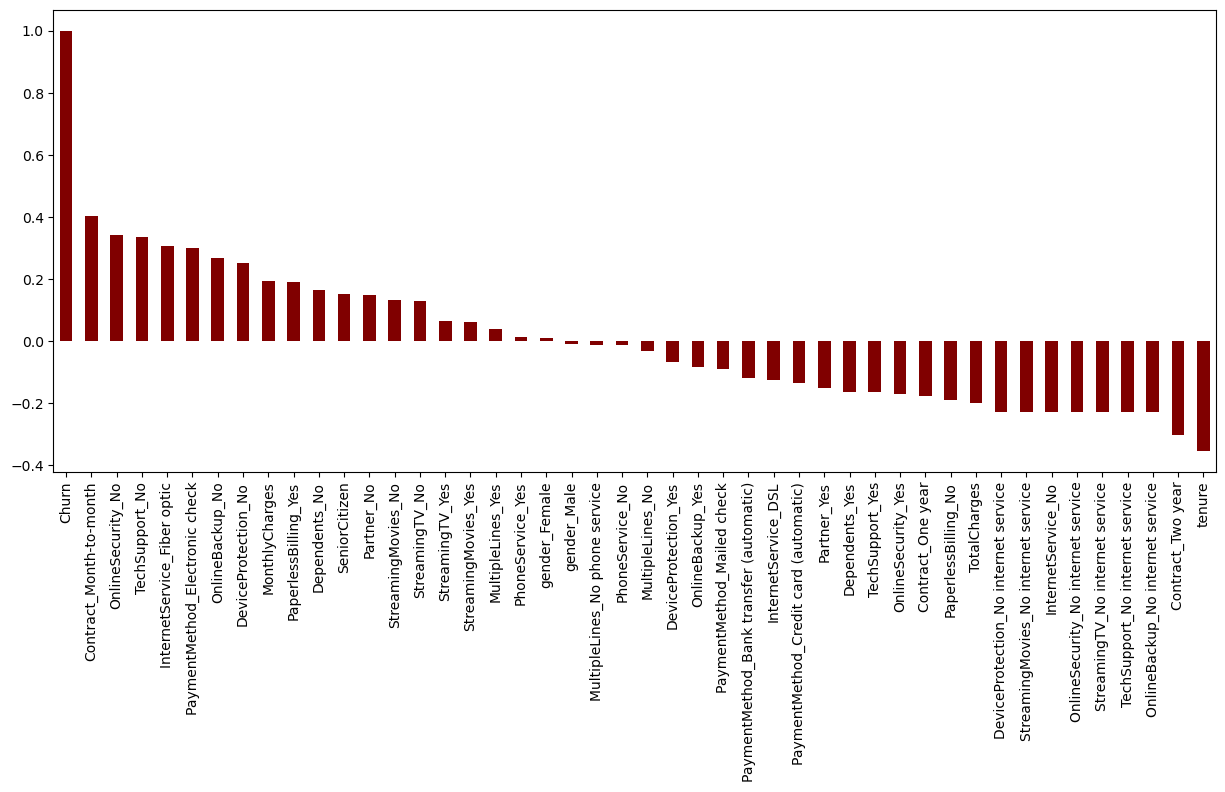

In [30]:
#building  a corelation of all the features with the output churn

# dataset_dummies.corr()['Churn'].sort_values(ascending = False)
# y = dataset_dummies.corr()['Churn'].sort_values(ascending = False).values
# x = dataset_dummies.corr()['Churn'].sort_values(ascending = False).index

plt.figure(figsize=(15,6))
dataset_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color='maroon')


Higher churn rate is seen in customers with the following service feature values -
i)  month to month contract type
ii) no online security
iii)no technical support
iv) fibre optic internet service 
v)  electronic check payment method

gender,multiple lines,tenure and phoneservice are features which do not really contribute to the churn outcome

tenure period,yearly contract types,features with no internet service have a low churn 

In [31]:
#heatmap displaying correlation between variables 

# plt.figure(figsize=(7,5))
# sns.heatmap(dataset_dummies.corr(), cmap='bwr')

In [39]:
#libraries to train ml models 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


In [33]:
dataset_dummies.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [34]:
x=dataset_dummies.drop('Churn',axis=1)
# x.head(3)
y = dataset_dummies['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

m1 = DecisionTreeClassifier(criterion='gini',random_state=40,max_depth=8,min_samples_leaf=10)
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=40)

In [46]:
y_pred = m1.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[1363,  205],
       [ 236,  306]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.7909952606635071

In [45]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1568
           1       0.60      0.56      0.58       542

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



Accuracy of model is not that great (<80%) ,and as analysed earlier the target variable is highly imbalanced which is why the churned label precision ,recall and f-1 score are so low.

To balance the data using upsampling -->use of Smote enn

In [49]:
se = SMOTEENN()

x_rs,y_rs = se.fit_resample(x,y)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_rs,y_rs,test_size = 0.3)

m1_smote = DecisionTreeClassifier(criterion = "gini",random_state = 42, max_depth=8, min_samples_leaf = 10)

m1_smote.fit(x_train_2,y_train_2)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

In [50]:
y_pred_2 = m1_smote.predict(x_test_2)
confusion_matrix(y_test_2,y_pred_2)


array([[722,  52],
       [ 57, 927]], dtype=int64)

In [51]:
accuracy_score(y_test_2,y_pred_2)

0.9379977246871445

In [52]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       774
           1       0.95      0.94      0.94       984

    accuracy                           0.94      1758
   macro avg       0.94      0.94      0.94      1758
weighted avg       0.94      0.94      0.94      1758



The upsampling has improved the overall accuracy of the decision tree model to 93.79 % from 79.09% .

The precision ,recall and f-1 score for the churned class has also improved considerably.

In [54]:
# building a random forest classifier for the same data to compare which models performs better[with upsampling]
m2_smote= RandomForestClassifier(n_estimators=100, min_samples_leaf=10,max_depth=8,criterion='gini', random_state = 42)
m2_smote.fit(x_train_2,y_train_2)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

In [55]:
y_pred_rf = m2_smote.predict(x_test_2)
confusion_matrix(y_test_2,y_pred_rf)

array([[709,  65],
       [ 28, 956]], dtype=int64)

In [56]:
accuracy_score(y_test_2,y_pred_rf)

0.947098976109215

In [57]:
print(classification_report(y_test_2, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       774
           1       0.94      0.97      0.95       984

    accuracy                           0.95      1758
   macro avg       0.95      0.94      0.95      1758
weighted avg       0.95      0.95      0.95      1758



The accuracy score of the random forest classifier(94.709%) is slightly higher than the decision tree classifier . 

The precision ,recall ,f-score of churned class is also fairly decent.

### So, we can use the Random Forest Classifier for making predictions of the possible customer churns in this telecom company.

In [59]:
#saving the model
# to be accessed by UI
import pickle

file_name = 'predict_churn.sav'
pickle.dump(m2_smote, open(file_name, 'wb'))


In [60]:
load = pickle.load(open(file_name, 'rb'))

In [63]:
model_score = accuracy_score(y_test_2,y_pred_rf)
model_score

0.947098976109215